## analysis for ngram results
raw results found in `notebooks/results/` folder.

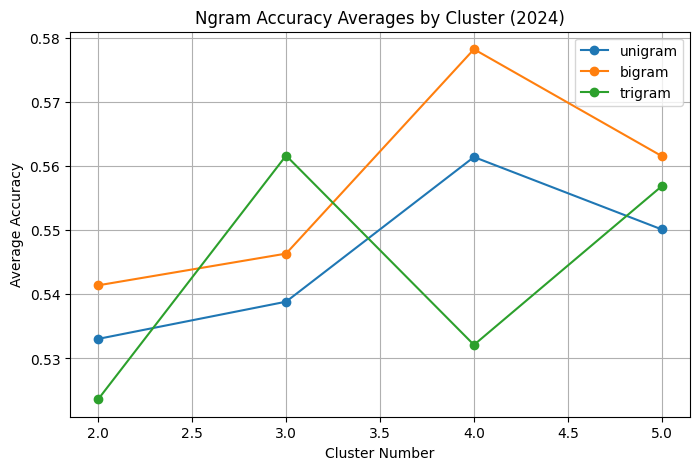

In [12]:
import os
import re
import matplotlib.pyplot as plt

FILE_PATH = "../results/cluster_"
CLUSTERS = ["2", "3", "4", "5"]
YEAR = "2024"

# Store averages for each cluster and ngram type
ngram_types = ['unigram', 'bigram', 'trigram']
cluster_averages = {ngram: [] for ngram in ngram_types}

for cluster in CLUSTERS:
    cluster_dir = f"{FILE_PATH}{cluster}"
    unigram_vals, bigram_vals, trigram_vals = [], [], []
    for root, _, files in os.walk(cluster_dir):
        for file in files:
            if file.endswith(f"_{YEAR}.txt"):
                file_path = os.path.join(root, file)
                with open(file_path, "r") as f:
                    content = f.read()
                    # Find the averages line at the bottom
                    match = re.search(r"averages:\s*({.*})", content)
                    if match:
                        averages_dict = eval(match.group(1))
                        unigram_vals.append(averages_dict.get('unigram', 0))
                        bigram_vals.append(averages_dict.get('bigram', 0))
                        trigram_vals.append(averages_dict.get('trigram', 0))
    # Compute mean for each ngram type for this cluster
    cluster_averages['unigram'].append(sum(unigram_vals)/len(unigram_vals) if unigram_vals else 0)
    cluster_averages['bigram'].append(sum(bigram_vals)/len(bigram_vals) if bigram_vals else 0)
    cluster_averages['trigram'].append(sum(trigram_vals)/len(trigram_vals) if trigram_vals else 0)

# Plotting
plt.figure(figsize=(8, 5))
for ngram in ngram_types:
    plt.plot([int(c) for c in CLUSTERS], cluster_averages[ngram], marker='o', label=ngram)
plt.xlabel("Cluster Number")
plt.ylabel("Average Accuracy")
plt.title(f"Ngram Accuracy Averages by Cluster ({YEAR})")
plt.legend()
plt.grid(True)
plt.savefig(f"ngram_accuracy_averages_by_cluster_{YEAR}.png")
plt.show()


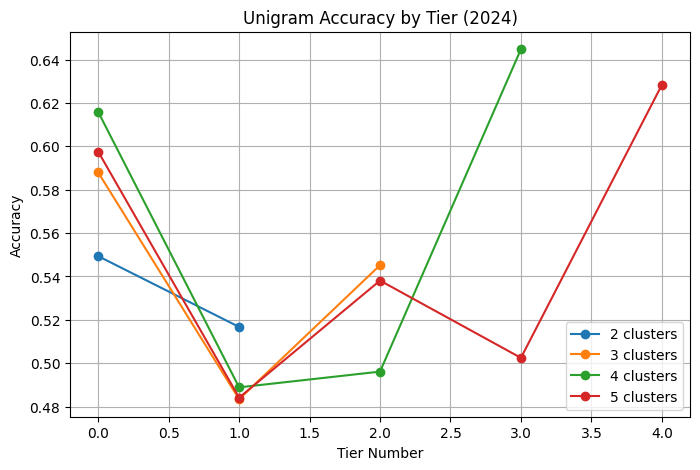

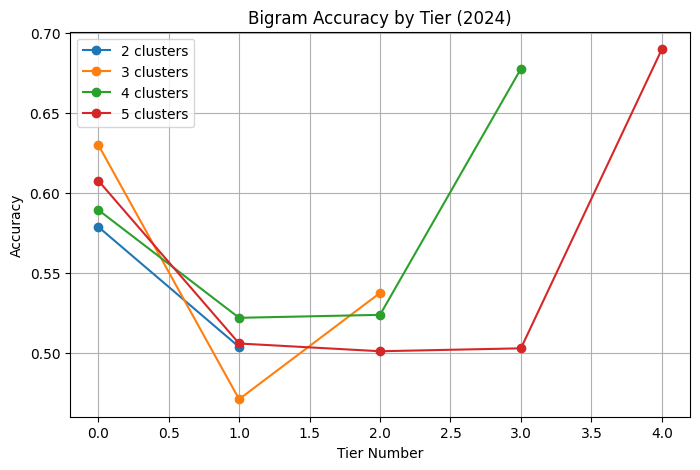

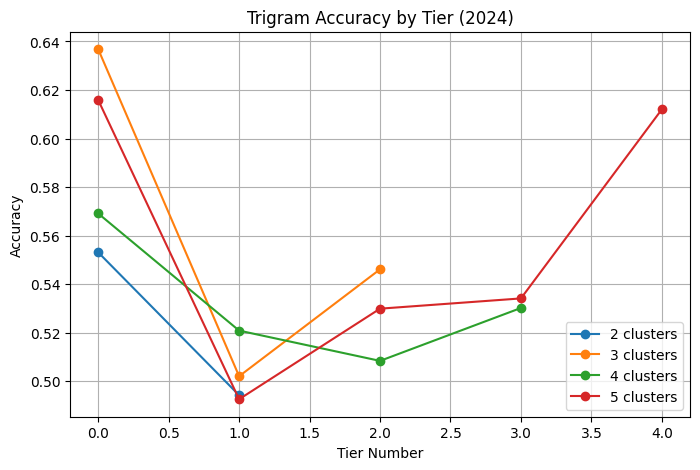

In [15]:

TIERS = ["0", "1", "2", "3", "4"]
MODELS = ["unigram", "bigram", "trigram"]
YEAR = "2024"

for model in MODELS:
    plt.figure(figsize=(8, 5))
    for cluster in CLUSTERS:
        tier_accuracies = []
        cluster_dir = f"{FILE_PATH}{cluster}"
        for tier in TIERS:
            # Find files for this tier
            tier_files = [f for f in os.listdir(cluster_dir) if f.startswith(f"ngram_results_tier_{tier}_") and f.endswith(f"_{YEAR}.txt")]
            # vals = []
            for file in tier_files:
                file_path = os.path.join(cluster_dir, file)
                with open(file_path, "r") as f:
                    content = f.read()
                    match = re.search(r"averages:\s*({.*})", content)
                    if match:
                        averages_dict = eval(match.group(1))
                        tier_accuracies.append(averages_dict.get(model, 0))
            # Average for this tier
            # tier_accuracies.append(sum(vals)/len(vals) if vals else 0)
        # Ensure tier_accuracies has same length as TIERS, filling missing values with None
        x_tiers = [int(t) for t in TIERS]
        y_accuracies = [tier_accuracies[i] if i < len(tier_accuracies) else None for i in range(len(x_tiers))]
        plt.plot(x_tiers, y_accuracies, marker='o', label=f"{cluster} clusters")
    plt.xlabel("Tier Number")
    plt.ylabel("Accuracy")
    plt.title(f"{model.capitalize()} Accuracy by Tier ({YEAR})")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{model}_accuracy_by_tier_{YEAR}.png")
    plt.show()
